In [57]:
import os
import sys
import pymongo
import json
import numpy as np
import pandas as pd
import calendar, datetime
import matplotlib.pyplot as plt
from pymongo import MongoClient

import statsmodels.api as sm
from arch.univariate import ARCH, GARCH, ConstantMean
from arch.univariate import ARX
from arch import arch_model


# Convert a unix time u to a datetime object d, and vice versa
def dt(u): return datetime.datetime.utcfromtimestamp(u)
def ut(d): return calendar.timegm(d.timetuple())

#CONNECT TO MONGO 
client = MongoClient("129.26.78.40:27017")
db = client['BitCoin']

day_zero = datetime.datetime(2016,12,31)
date0 = datetime.datetime(2017,1,3)
datef = datetime.datetime(2017,8,1)

%matplotlib inline

In [58]:
mempool_data = "/home/cesar/Desktop/Doctorado/Projects/BitCoin/Data/MemPool/"

In [59]:
os.listdir(mempool_data)

['mempool-15-07-2015-to-20-09-2017.json',
 'mempool-size.json',
 'mempool-count.json',
 'mempool-growth.json']

In [60]:
mempool_size = json.load(open("/home/cesar/Desktop/Doctorado/Projects/BitCoin/Data/MemPool/mempool-size.json","r"))
mempool_count = json.load(open("/home/cesar/Desktop/Doctorado/Projects/BitCoin/Data/MemPool/mempool-count.json","r"))
mempool_growth = json.load(open("/home/cesar/Desktop/Doctorado/Projects/BitCoin/Data/MemPool/mempool-growth.json","r"))

# SIZE

In [82]:
INDEX = []
VALUE = []
for mempool_count_data in mempool_size["values"]:
    INDEX.append(dt(mempool_count_data["x"]))
    VALUE.append(mempool_count_data["y"])
mempool_size_ts = pd.Series(VALUE,index=INDEX)

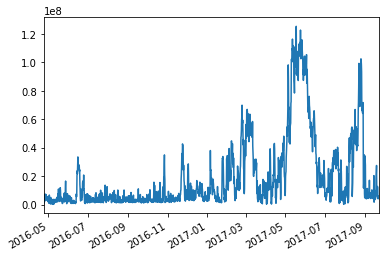

In [83]:
mempool_size_ts.plot()

# GROWTH

In [84]:
INDEX = []
VALUE = []
for mempool_count_data in mempool_growth["values"]:
    INDEX.append(dt(mempool_count_data["x"]))
    VALUE.append(mempool_count_data["y"])
mempool_growth_ts = pd.Series(VALUE,index=INDEX)

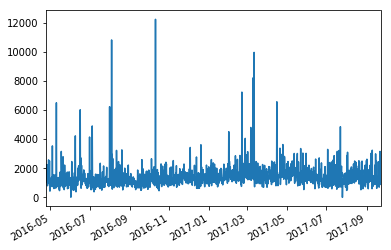

In [85]:
mempool_growth_ts.plot()

# COUNT 

In [86]:
INDEX = []
VALUE = []
for mempool_count_data in mempool_count["values"]:
    INDEX.append(dt(mempool_count_data["x"]))
    VALUE.append(mempool_count_data["y"])
mempool_count_ts = pd.Series(VALUE,index=INDEX)

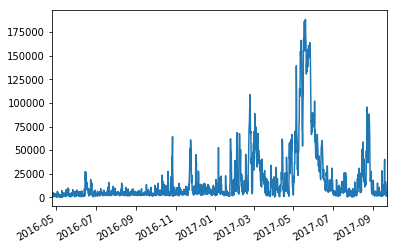

In [87]:
mempool_count_ts.plot()

In [89]:
print len(mempool_count_ts)
print len(mempool_size_ts)
print len(mempool_growth_ts)

1502
1502
1501


In [94]:
MEMPOOL_DATA_FRAME = pd.DataFrame({"GROWTH":mempool_growth_ts,"COUNT":mempool_count_ts,"SIZE":mempool_size_ts})

In [95]:
MEMPOOL_DATA_FRAME.to_csv("/home/cesar/Desktop/Doctorado/Projects/BitCoin/Data/MemPool/mempool_dataframe.csv")